In [1]:
from pylab import *
%matplotlib inline

In [11]:
def ec_mov(x_p,t,a=0): #definir ecuaciones de movimiento
    r3_2=(x_p[0]**2+x_p[1]**2)**(1.5) #x_p representa (x,y,px,py)=(0,1,2,3), r3_2 es r^(3/2)
    desv=1+a
    dx=x_p[2]*desv
    dy=x_p[3]
    dpx=-(x_p[0]*desv)/(r3_2)
    dpy=-(x_p[1]*desv)/(r3_2)
    return array([dx,dy,dpx,dpy])

In [12]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de segundo orden
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

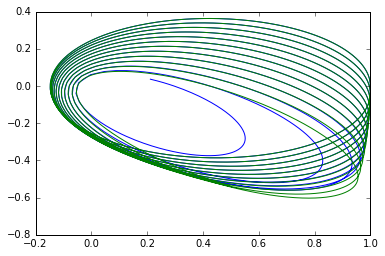

In [44]:
#mejor pas de integracion 0.001, y 0.0001
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,.01)
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,0.0001)
plot(sol[:,0],sol[:,1])
show()

In [45]:
def Energia(x_p,a):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E=0.5*(px*px*(1+a)+py*py)-((1+a)/sqrt(x**2+y**2))
    return E

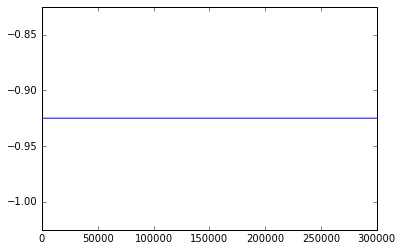

In [46]:
E=Energia(sol,0.05)
ylim([E[0]-0.1,E[0]+0.1])
plot(E)

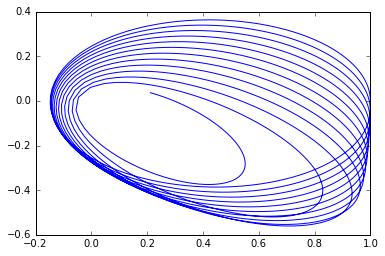

In [47]:
#mejor pas de integracion 0.001, y 0.0001
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,.01)
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
show()

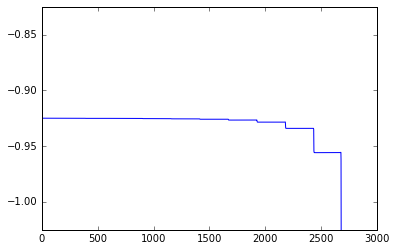

In [48]:
E=Energia(sol,0.05)
ylim([E[0]-0.1,E[0]+0.1])
plot(E)

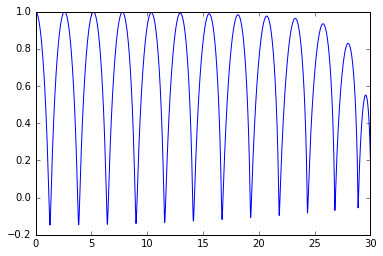

In [51]:
plot(t,sol[:,0])